# Table of Contents

- [1. Introduction](#1-introduction)  
  - [1.1 Libraries And Utilities](#11-libraries-and-utilities)  
  - [1.2 Data Preprocessing – loading, Missingvalues, and feature extraction](#12-data-preprocessing---loading-missingvalues-and-feature-extraction)  

- [2. Storytelling With Data – Explanatory Data Analysis](#2-storytelling-with-data--explanatory-data-analysis)  
  - [2.0 Distribution of targets](#20-distribution-of-targets)  
  - [2.1 Univariate analysis of continuous variables](#21-univariate-analysis-of-continuous-variables)  
  - [2.2 Overview of univariate categorical features](#22-overview-of-univariate-categorical-features)  
  - [2.3 Univariate analysis of categorical variables](#23-univariate-analysis-of-categorical-variables)  
  - [2.4 Relationship between two continuous variables](#24-relationship-between-two-continuous-variables)  
  - [2.5 Visualization of the correlations between features](#25-visualization-of-the-correlations-between-features)  

- [3. Visualization of Data Balancing with Datasampling techniques](#3-visualization-of-data-balancing-with-datasampling-techniques)  
- [4. Modeling and results](#4-modeling-and-results)  
</div>


# 1. Introduction

Did you know that every year there are approximately 12.2 million new stroke cases worldwide, and about 6.5 million of these end in death? But what about the roughly 5.7 million survivors? For them, a stroke is not a fresh start—it means a fight to walk again, to speak again, to handle everyday tasks. Each year, millions leave the hospital with muscle control lost in an instant, struggling to articulate words and coping with impaired hand function. In this dataset, we will explore, through visualizations, which features contribute most to stroke. We’ll see which conditions trigger strokes most strongly, how they interrelate, and we’ll attempt to predict the likelihood of future stroke occurrences.


## Problem Statement

---



Visualize the relationships between various Healthy and Unhealthy habits to understand the reasons behind stroke disease, and thereby predict stroke probability using the best model and hypertuned parameters.



## Questions and Assumptions

---

1) Are older individuals (>65) significantly more likely to have a stroke than younger individuals (<65)?

2) Is there a significant relationship between heart disease and stroke? Can we say that people with heart disease are more likely to have a stroke?

3) Males are most susceptible to strokes due to high work related stress, is it true?

4) Are glucose level variances equal in patients with and without hypertension?

5) Is the stroke rate significantly different in “Ever_married = Yes” people compared to those who are not married?

6) Relationship between continuous and categorical data

7) Feature importance and Feature Selection for accurate predictions

8) People working in private jobs may be the majority of people with strokes(mostly cause of stress).

9) People living in urban areas have more chances of getting stroke? (need to confirm)

10) BMI must be closely observed with age and gender.

## 1.1 Libraries And Utilities

In [104]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import time

import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
!pip install pywaffle
from pywaffle import Waffle

%matplotlib inline
init_notebook_mode(connected= True)

from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             auc,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)


from imblearn.datasets import make_imbalance
from imblearn.under_sampling import (RandomUnderSampler,
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)


from imblearn.over_sampling import (SMOTE,
                                    ADASYN)


# model algorithms
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


## 1.2 Data Preprocessing – Loading, Missing Values, and Feature Extraction

In this section, loading of data, visualizing missing values, and feature extraction will be carried out. In the current dataset, there are 11 features and one binary target. A brief information about the features is given below;
  1. id: Identification number of the individual.
  2. gender: Gender of the individual.
  3. hypertension: Health related parameter, does person have hypertension.
  4. heart_disease: Health related parameter, does person have heart disease.
  5. ever_married: Personal information, is person married on not?
  6. work_type: Nature of work place.
  7. Residence_type: Residence type of the individual.
  8. avg_glucose_level: average glucose level in blood for the individual.
  9. bmi: body mass index of the individual.
  10. smoking_status: Habitual information. Current smoking status of individual.
  11. stroke: Our target, is person suffered a heart attack?

### Loading Data

In [105]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("healthcare-dataset-stroke-data 3.csv")
df.head()
df.head(5).T

Saving healthcare-dataset-stroke-data 3.csv to healthcare-dataset-stroke-data 3 (1).csv


,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,NaN,32.5,34.4,24.0


## Non-Null ValueCounts and Feature Datatypes


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Statistics of Categorical and Numerical Data


In [107]:
# stats of numerical data
round(df.describe(exclude='object'),2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [108]:
# stats of categorical data
round(df.describe(exclude=['float','int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## Initial Insights of Dataset

1. Data from bmi feature is missing.
2. Both Categorical and numerical features are present.
  * Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status
  * Binary Numerical Features: hypertension,heart_disease, stroke
  * Continous Numerical Features: age, avg_glucose_level, bmi
3. Most of the data is categorical which need a special attention to visulaize those
4. Feature extraction can be done by binning the continous features ( age, sugar level, and bmi) and let's keep every things as it is.

## Missing Data

In [109]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


There are several ways to fill in missing data; in addition to traditional methods like mean and median, methods like Decision Tree Prediction or K-Nearest Neighbor can also be applied. I will fill in using the median.

In [110]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


## Feature Extraction / Binning

In [111]:
df['bmi_cat'] = pd.cut(df['bmi'], bins=[0,19,25,40,100], labels=['Moderate weight','Overweight','Obesity','Severe obesity'])
df['age_cat'] = pd.cut(df['age'], bins=[13,18,45,65,100], labels=['Teenager','Adult','Middle-aged person','Elderly Man/Woman'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

  * https://www.medicalnewstoday.com/articles/323446#weight-and-height-guide (bmi binning)

  * https://kidspicturedictionary.com/english-through-pictures/people-english-through-pictures/age-physical-description/ (Age binning)

  * https://agamatrix.com/blog/normal-blood-sugar-level-chart/ (Glucose Level binning)

## Statistical Inferences

### Question 1: When comparing stroke rates across different work_type groups, which groups are significantly different from each other?

----

In [158]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

np.random.seed(42)
df = pd.DataFrame({
    'work_type': np.random.choice(['Private', 'Self-employed', 'Govt_job', 'Children', 'Never_worked'], 500),
    'stroke': np.random.choice([0, 1], 500, p=[0.9, 0.1])
})

contingency_table = pd.crosstab(df['work_type'], df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

group_rates = df.groupby('work_type')['stroke'].mean().reset_index()

model = sm.formula.glm("stroke ~ C(work_type)", data=df, family=sm.families.Binomial()).fit()
pairwise_results = model.summary()

(contingency_table, chi2, p, group_rates, pairwise_results)


(stroke           0   1
 work_type             
 Children       102  10
 Govt_job        85   6
 Never_worked    80  13
 Private        102   7
 Self-employed   78  17,
 np.float64(10.33422383076244),
 np.float64(0.03515876710414655),
        work_type    stroke
 0       Children  0.089286
 1       Govt_job  0.065934
 2   Never_worked  0.139785
 3        Private  0.064220
 4  Self-employed  0.178947,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:                 stroke   No. Observations:                  500
 Model:                            GLM   Df Residuals:                      495
 Model Family:                Binomial   Df Model:                            4
 Link Function:                  Logit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -164.06
 Date:                Mon, 11 Aug 2025   Deviance:                

Chi-square test: χ² = 10.33, p = 0.035 → There is a statistically significant overall relationship between work_type and stroke.

Pseudo R² (CS): 0.0197 → The model’s explanatory power is low, but there may still be significant differences between some groups.

###  Question 2: Does the effect of hypertension on stroke risk increase with age?

---



# 2. Exploratory Data Analysis

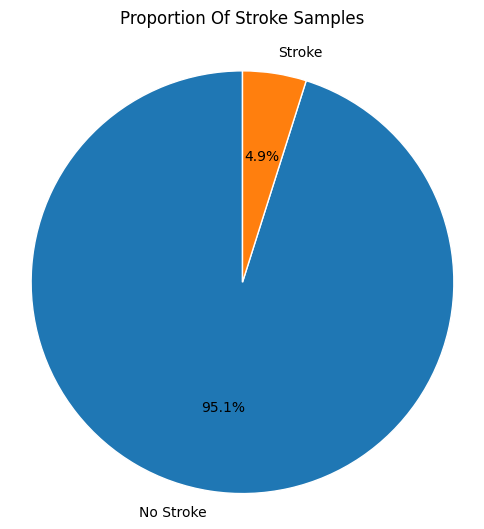

In [112]:
counts = df['stroke'].value_counts()
labels = ['No Stroke', 'Stroke']
sizes  = counts.values
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'w'}
)
ax.set_title('Proportion Of Stroke Samples', pad=20)
ax.axis('equal')
plt.show()

We are dealing with an imbalanced dataset. We will use the upscaling technique in pipeline.

## 2.1 Univariate of Continuous Variables

### Age

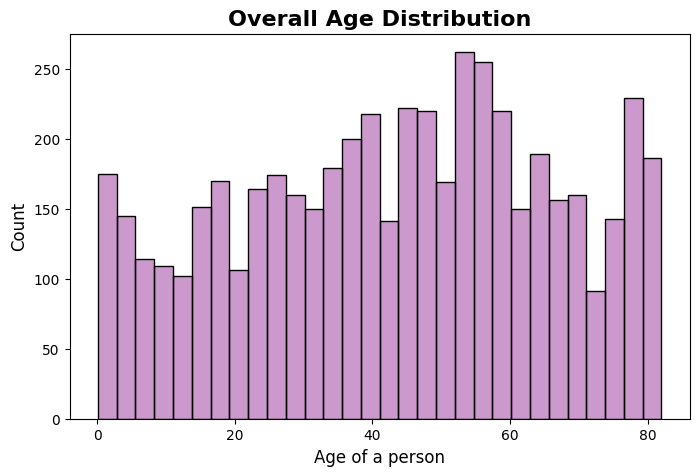

In [113]:
plt.figure(figsize=(8,5))

sns.histplot(data=df, x='age', bins=30, color='purple', alpha=0.4)

plt.title('Overall Age Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Age of a person', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


The age distribution in the dataset follows a normal distribution, with no significant skewness. It mostly consists of middle-aged and older individuals.

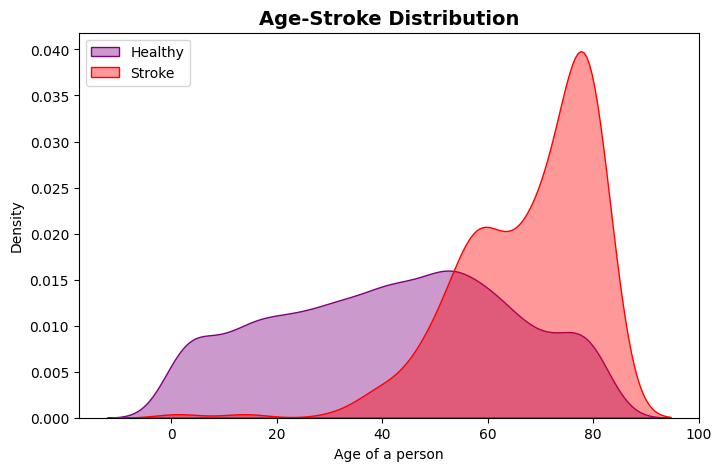

In [114]:
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=df[df['stroke'] == 0],
    x='age',
    fill=True,
    color='purple',
    alpha=0.4,
    label='Healthy'
)
sns.kdeplot(
    data=df[df['stroke'] == 1],
    x='age',
    fill=True,
    color='red',
    alpha=0.4,
    label='Stroke'
)

plt.title('Age-Stroke Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age of a person')
plt.ylabel('Density')
plt.legend()
plt.show()

Older individuals have a significantly higher likelihood of having a stroke. Age emerges as an important factor, with the incidence rate being notably higher among those over 60.

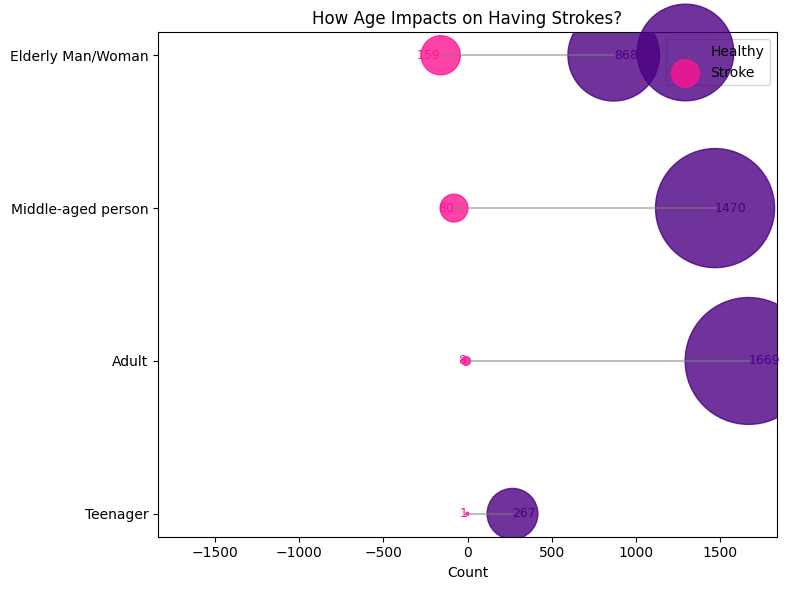

In [115]:
labels = ['Teenager','Adult','Middle-aged person','Elderly Man/Woman']
bins   = [13, 18, 45, 65, 100]

df['age_cat'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

age_counts = df.groupby(['age_cat', 'stroke']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(8,6))

y_pos = range(len(age_counts))

ax.scatter(age_counts[0], y_pos, s=age_counts[0]*5, color="#4B0082", alpha=0.8, label="Healthy")

ax.scatter(-age_counts[1], y_pos, s=age_counts[1]*5, color="#FF1493", alpha=0.8, label="Stroke")

for i, (stroke_val, healthy_val) in enumerate(zip(age_counts[1], age_counts[0])):
    ax.plot([ -stroke_val, healthy_val ], [i, i], color="gray", alpha=0.5)

ax.set_yticks(y_pos)
ax.set_yticklabels(age_counts.index)

ax.set_xlabel("Count")
ax.set_xlim(-max(age_counts.max())*1.1, max(age_counts.max())*1.1)
ax.set_title("How Age Impacts on Having Strokes?")
ax.legend(loc="upper right")

for i, (stroke_val, healthy_val) in enumerate(zip(age_counts[1], age_counts[0])):
    ax.text(-stroke_val, i, str(stroke_val), va='center', ha='right', fontsize=9, color="#FF1493")
    ax.text(healthy_val, i, str(healthy_val), va='center', ha='left', fontsize=9, color="#4B0082")

plt.tight_layout()
plt.show()

The age distribution of healthy and stroke patients is not normally distributed. It appears that a transformation should be applied. In addition, the diseases are observed mostly among middle-aged and older individuals.

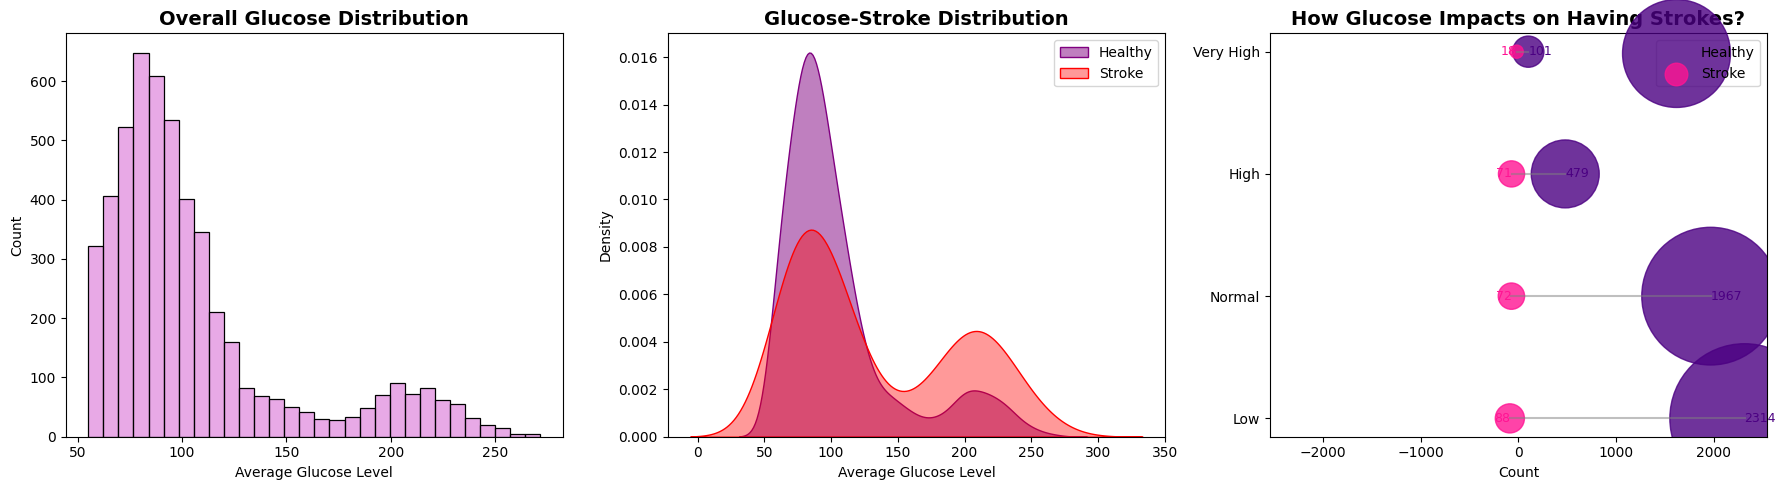

In [116]:
glucose_labels = ['Low', 'Normal', 'High', 'Very High']
glucose_bins = [0, 90, 160, 230, 500]
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins=glucose_bins, labels=glucose_labels, right=False)

fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(df['avg_glucose_level'], bins=30, color="orchid", edgecolor="black", alpha=0.6, ax=axes[0])
axes[0].set_title("Overall Glucose Distribution", fontsize=14, weight='bold')
axes[0].set_xlabel("Average Glucose Level")
axes[0].set_ylabel("Count")

sns.kdeplot(df[df['stroke'] == 0]['avg_glucose_level'], shade=True, color="purple", alpha=0.5, label="Healthy", ax=axes[1])
sns.kdeplot(df[df['stroke'] == 1]['avg_glucose_level'], shade=True, color="red", alpha=0.4, label="Stroke", ax=axes[1])
axes[1].set_title("Glucose-Stroke Distribution", fontsize=14, weight='bold')
axes[1].set_xlabel("Average Glucose Level")
axes[1].set_ylabel("Density")
axes[1].legend()

glucose_counts = df.groupby(['glucose_cat', 'stroke']).size().unstack(fill_value=0)
y_pos = range(len(glucose_counts))

axes[2].scatter(glucose_counts[0], y_pos, s=glucose_counts[0]*5, color="#4B0082", alpha=0.8, label="Healthy")
axes[2].scatter(-glucose_counts[1], y_pos, s=glucose_counts[1]*5, color="#FF1493", alpha=0.8, label="Stroke")

for i, (stroke_val, healthy_val) in enumerate(zip(glucose_counts[1], glucose_counts[0])):
    axes[2].plot([-stroke_val, healthy_val], [i, i], color="gray", alpha=0.5)
    axes[2].text(-stroke_val, i, str(stroke_val), va='center', ha='right', fontsize=9, color="#FF1493")
    axes[2].text(healthy_val, i, str(healthy_val), va='center', ha='left', fontsize=9, color="#4B0082")

axes[2].set_yticks(y_pos)
axes[2].set_yticklabels(glucose_counts.index)
axes[2].set_xlim(-max(glucose_counts.max())*1.1, max(glucose_counts.max())*1.1)
axes[2].set_xlabel("Count")
axes[2].set_title("How Glucose Impacts on Having Strokes?", fontsize=14, weight='bold')
axes[2].legend(loc="upper right")

plt.tight_layout()
plt.show()


* There is a right-skewed distribution. The number of individuals with high glucose levels is low. A transformation should be applied."

* Glucose level does not have a significant effect on stroke occurrence.

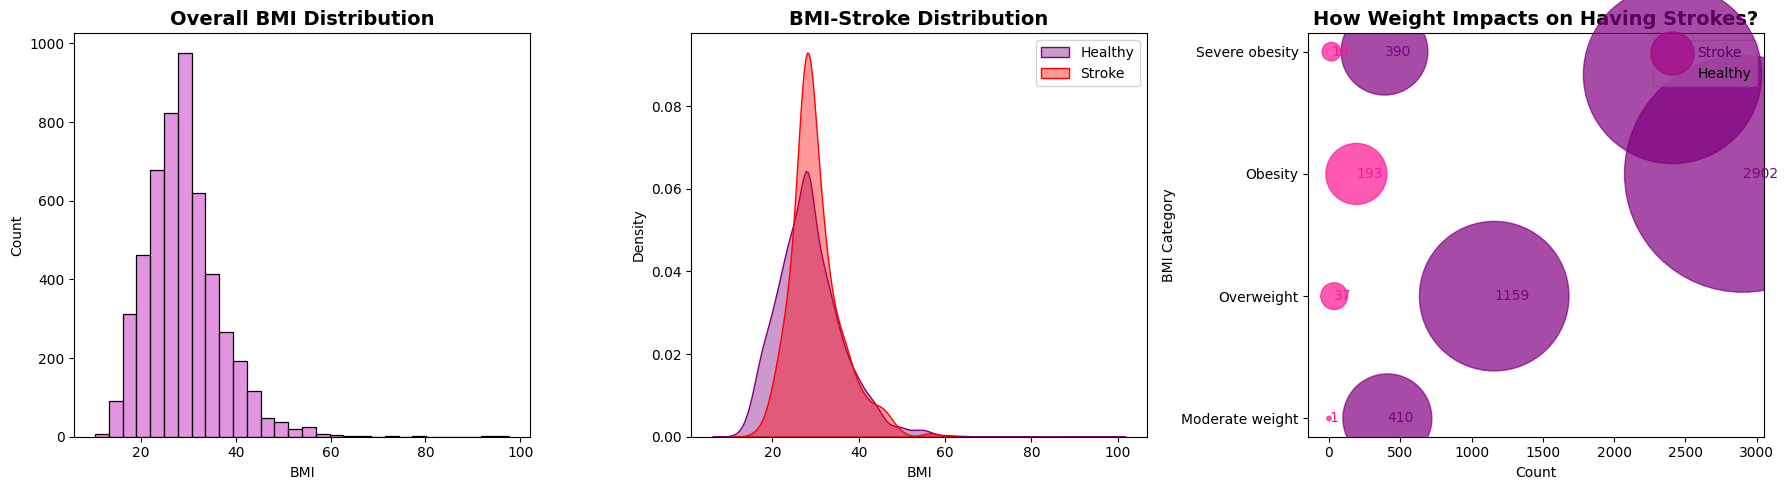

In [117]:

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.histplot(df['bmi'], bins=30, color='orchid', edgecolor='black')
plt.title("Overall BMI Distribution", fontsize=14, weight='bold')
plt.xlabel("BMI")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.kdeplot(data=df[df['stroke']==0]['bmi'],
            fill=True, color='purple', alpha=0.4, label='Healthy')
sns.kdeplot(data=df[df['stroke']==1]['bmi'],
            fill=True, color='red', alpha=0.4, label='Stroke')
plt.title("BMI-Stroke Distribution", fontsize=14, weight='bold')
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend()

plt.subplot(1,3,3)

bmi_counts = df.groupby(['bmi_cat','stroke']).size().reset_index(name='count')

stroke_counts = bmi_counts[bmi_counts['stroke']==1]
healthy_counts = bmi_counts[bmi_counts['stroke']==0]

plt.scatter(stroke_counts['count'], stroke_counts['bmi_cat'],
            s=stroke_counts['count']*10, color='deeppink', label='Stroke', alpha=0.7)
plt.scatter(healthy_counts['count'], healthy_counts['bmi_cat'],
            s=healthy_counts['count']*10, color='purple', label='Healthy', alpha=0.7)

for i, row in stroke_counts.iterrows():
    plt.text(row['count'], row['bmi_cat'], row['count'], va='center', ha='left', fontsize=10, color='deeppink')
for i, row in healthy_counts.iterrows():
    plt.text(row['count'], row['bmi_cat'], row['count'], va='center', ha='left', fontsize=10, color='purple')

plt.title("How Weight Impacts on Having Strokes?", fontsize=14, weight='bold')
plt.xlabel("Count")
plt.ylabel("BMI Category")
plt.legend()

plt.tight_layout()
plt.show()


* The BMI feature exhibits high right-skewness.

* Stroke is more prevalent among individuals with high BMI.

## 2.2 Overview of Univariate Categorical Variables

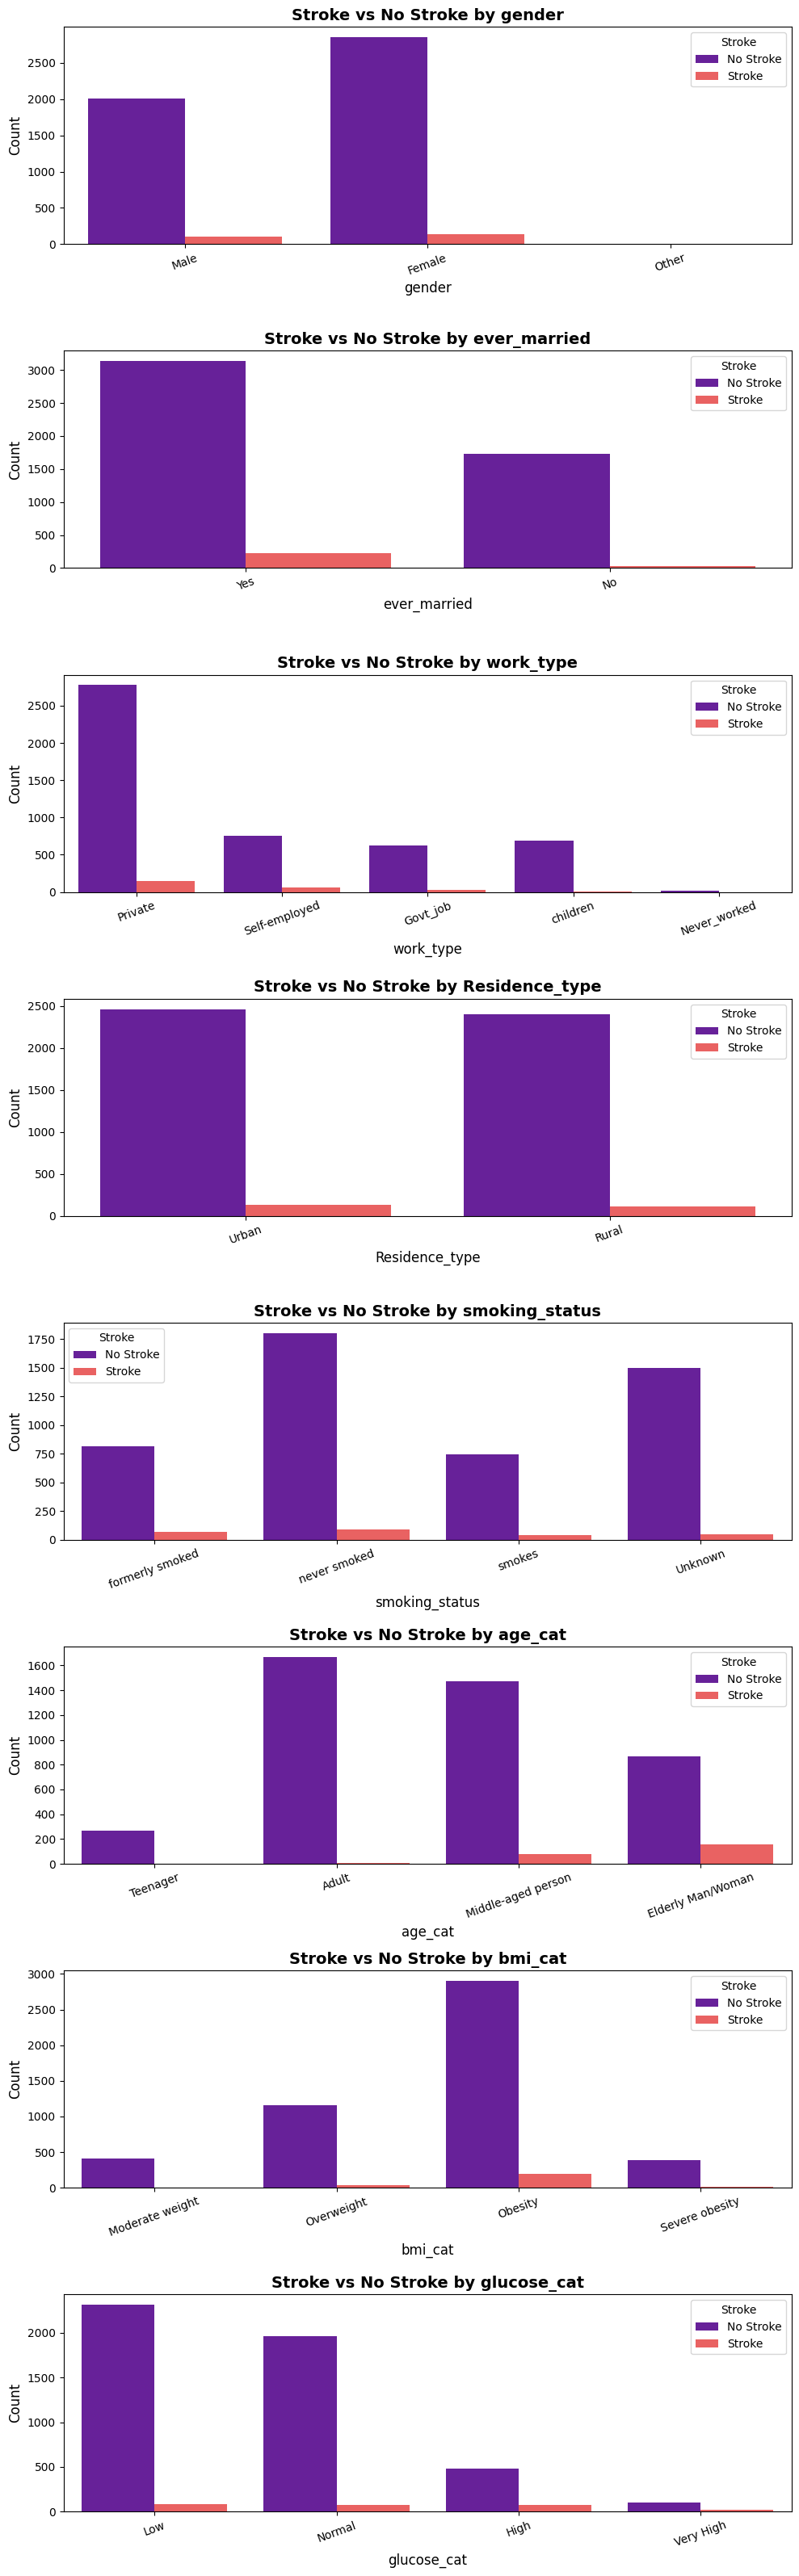

In [118]:

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type',
                    'smoking_status', 'age_cat', 'bmi_cat', 'glucose_cat']

fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(10, len(categorical_cols)*4))

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue='stroke', palette=['#6a0dad', '#ff4c4c'], ax=ax)
    ax.set_title(f"Stroke vs No Stroke by {col}", fontsize=14, fontweight='bold')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.legend(title="Stroke", labels=["No Stroke", "Stroke"])
    ax.tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


* Now, let’s focus more specifically on each individual feature.


## 2.3 Univariate analysis of categorical features

## Gender Distribution

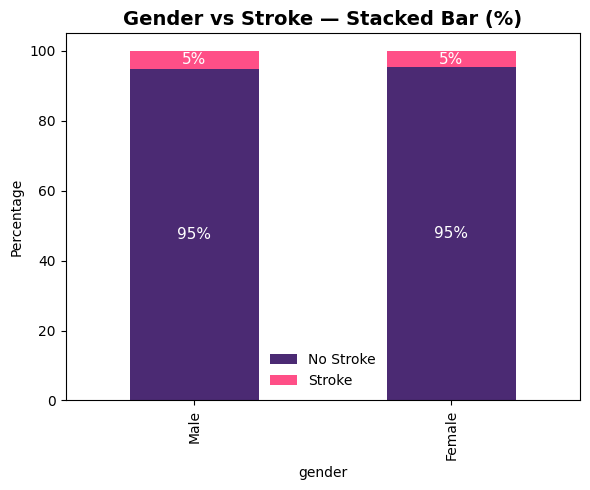

In [119]:
pct = (df.groupby(['gender', 'stroke']).size()
         .unstack(fill_value=0)
         .rename(columns={0: 'No Stroke', 1: 'Stroke'})
         .pipe(lambda x: x.div(x.sum(axis=1), axis=0) * 100)
         .loc[['Male', 'Female']])

colors = ["#4b2a73", "#ff4f87"]

pct.plot(kind='bar', stacked=True, color=colors, figsize=(6,5), edgecolor='none')

for i, (idx, row) in enumerate(pct.iterrows()):
    cum = 0
    for val in row:
        if val > 3:
            plt.text(i, cum + val/2, f"{val:.0f}%", ha='center', va='center', color='white', fontsize=11)
        cum += val

plt.ylabel("Percentage")
plt.title("Gender vs Stroke — Stacked Bar (%)", fontsize=14, weight='bold')
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


* Her iki cinsiyette de aynı oranda hastalık vardır.

## HyperTension Distribution

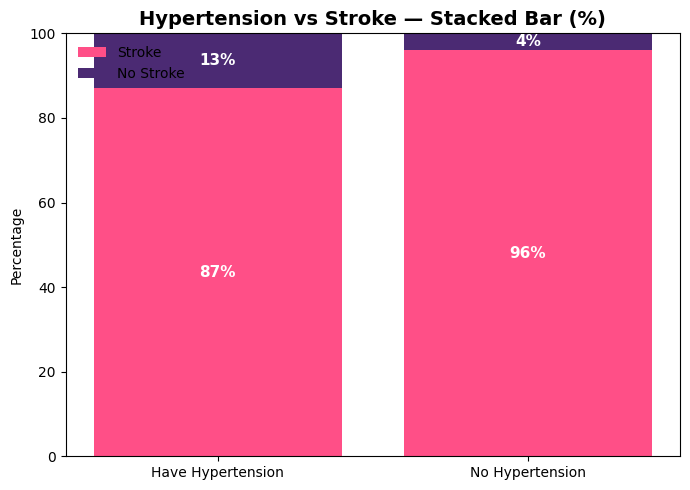

In [120]:

categories = ["Have Hypertension", "No Hypertension"]

stroke_pct = [stroke_yes, stroke_no]
no_stroke_pct = [healthy_yes, healthy_no]

colors = ["#ff4f87", "#4b2a73"]

fig, ax = plt.subplots(figsize=(7,5))
bottom = np.zeros(len(categories))

for i, (label, color) in enumerate(zip(["Stroke", "No Stroke"], colors)):
    values = stroke_pct if label == "Stroke" else no_stroke_pct
    ax.bar(categories, values, bottom=bottom, label=label, color=color)
    for j, v in enumerate(values):
        ax.text(j, bottom[j] + v/2, f"{v}%", ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    bottom += values

ax.set_ylabel("Percentage")
ax.set_title("Hypertension vs Stroke — Stacked Bar (%)", fontsize=14, weight='bold')
ax.legend(frameon=False)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


* As the rate of hypertension increases, the incidence of stroke appears to rise by about 9%.

## Heart Disease Distribution

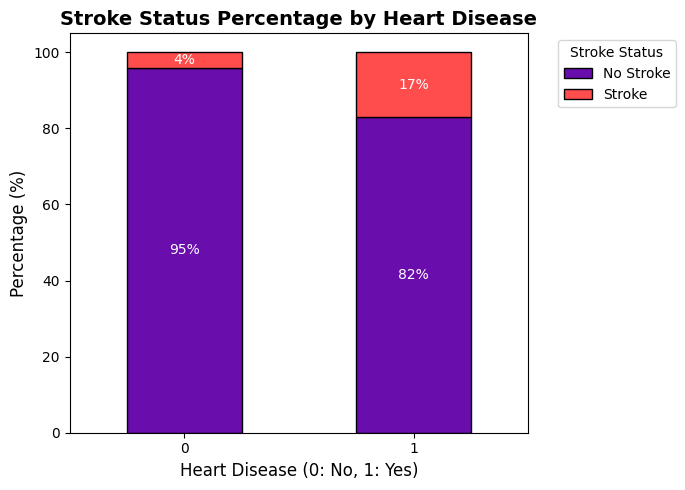

In [121]:

heart_disease_stroke_counts = df.groupby(['heart_disease', 'stroke']).size().unstack(fill_value=0)

heart_disease_stroke_pct = heart_disease_stroke_counts.apply(lambda x: x / x.sum() * 100, axis=1)

heart_disease_stroke_pct = heart_disease_stroke_pct.rename(columns={0: 'No Stroke', 1: 'Stroke'})

ax = heart_disease_stroke_pct.plot(kind='bar', stacked=True, figsize=(7, 5), color=['#6a0dad', '#ff4c4c'], edgecolor='black')

plt.title('Stroke Status Percentage by Heart Disease', fontsize=14, weight='bold')
plt.xlabel('Heart Disease (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Stroke Status', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%d%%', label_type='center', color='white', fontsize=10)

plt.tight_layout()
plt.show()

* Heart disease significantly affects stroke status.

## Marriage Distribution


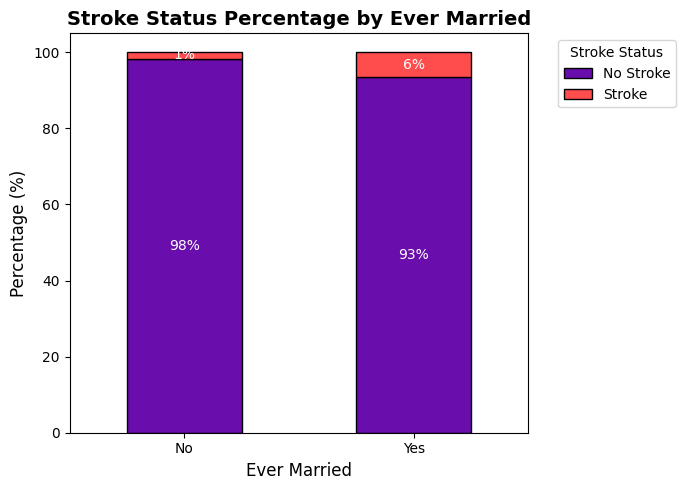

In [122]:

ever_married_stroke_counts = df.groupby(['ever_married', 'stroke']).size().unstack(fill_value=0)

ever_married_stroke_pct = ever_married_stroke_counts.apply(lambda x: x / x.sum() * 100, axis=1)

ever_married_stroke_pct = ever_married_stroke_pct.rename(columns={0: 'No Stroke', 1: 'Stroke'})

ax = ever_married_stroke_pct.plot(kind='bar', stacked=True, figsize=(7, 5), color=['#6a0dad', '#ff4c4c'], edgecolor='black')

plt.title('Stroke Status Percentage by Ever Married', fontsize=14, weight='bold')
plt.xlabel('Ever Married', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Stroke Status', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%d%%', label_type='center', color='white', fontsize=10)

plt.tight_layout()
plt.show()

* Being married appears to have a slight effect on stroke occurrence.

## Residence Distribution

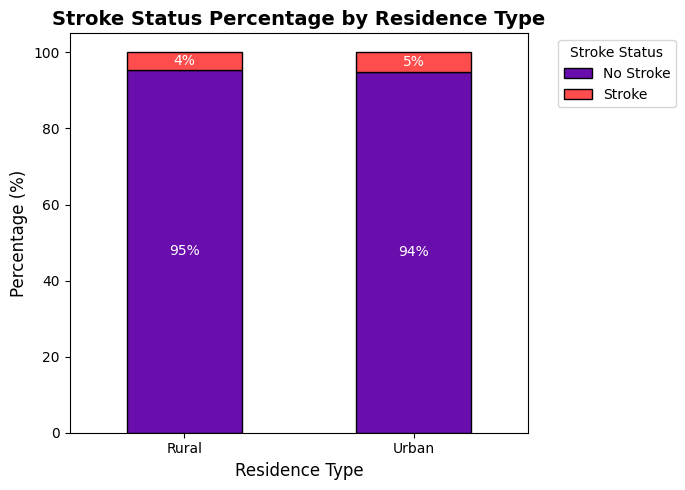

In [123]:

residence_stroke_counts = df.groupby(['Residence_type', 'stroke']).size().unstack(fill_value=0)

residence_stroke_pct = residence_stroke_counts.apply(lambda x: x / x.sum() * 100, axis=1)

residence_stroke_pct = residence_stroke_pct.rename(columns={0: 'No Stroke', 1: 'Stroke'})

ax = residence_stroke_pct.plot(kind='bar', stacked=True, figsize=(7, 5), color=['#6a0dad', '#ff4c4c'], edgecolor='black')

plt.title('Stroke Status Percentage by Residence Type', fontsize=14, weight='bold')
plt.xlabel('Residence Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Stroke Status', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%d%%', label_type='center', color='white', fontsize=10)

plt.tight_layout()
plt.show()

* The place where people live does not appear to have an effect on stroke disease.

## Smoking Distribution


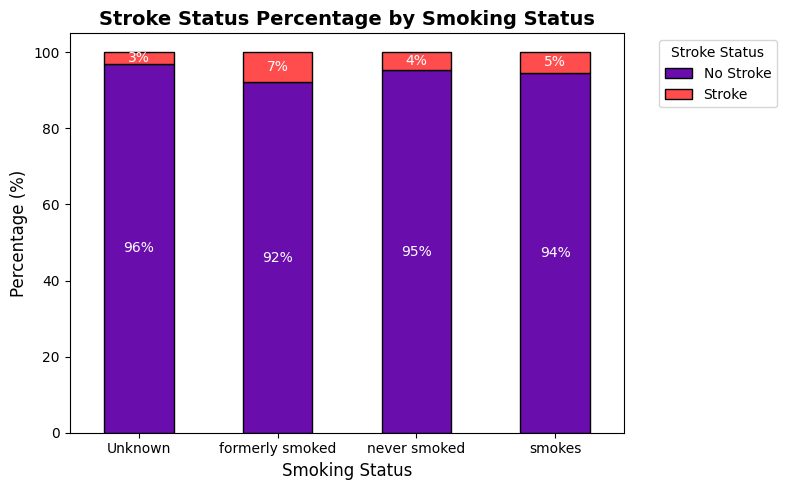

In [124]:

smoking_stroke_counts = df.groupby(['smoking_status', 'stroke']).size().unstack(fill_value=0)

smoking_stroke_pct = smoking_stroke_counts.apply(lambda x: x / x.sum() * 100, axis=1)

smoking_stroke_pct = smoking_stroke_pct.rename(columns={0: 'No Stroke', 1: 'Stroke'})

ax = smoking_stroke_pct.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#6a0dad', '#ff4c4c'], edgecolor='black')

plt.title('Stroke Status Percentage by Smoking Status', fontsize=14, weight='bold')
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Stroke Status', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%d%%', label_type='center', color='white', fontsize=10)

plt.tight_layout()
plt.show()

* Interestingly, smoking status does not appear to have a significant effect on stroke disease.

## Work Distribution


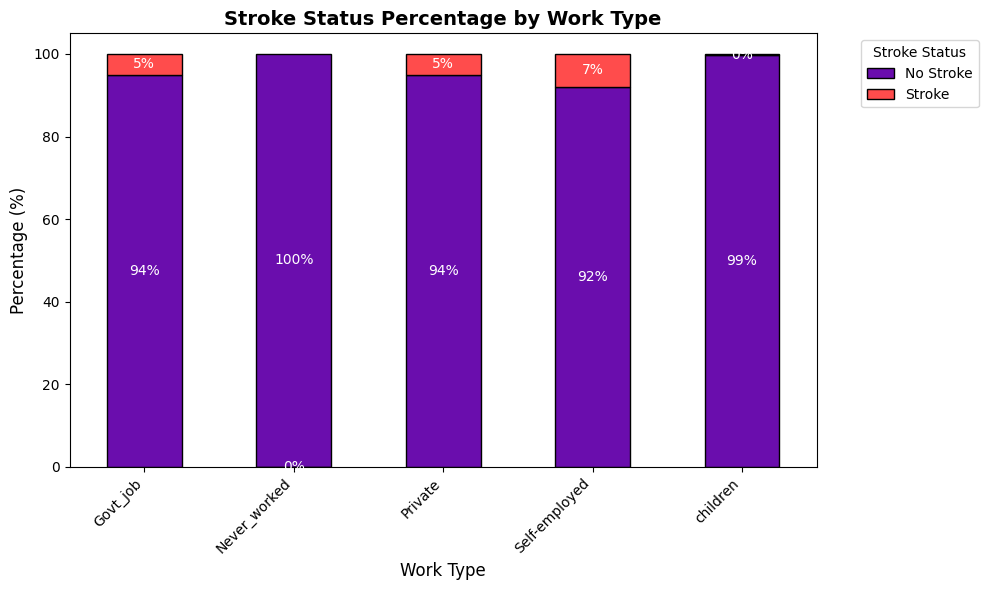

In [125]:
work_type_stroke_counts = df.groupby(['work_type', 'stroke']).size().unstack(fill_value=0)

work_type_stroke_pct = work_type_stroke_counts.apply(lambda x: x / x.sum() * 100, axis=1)

work_type_stroke_pct = work_type_stroke_pct.rename(columns={0: 'No Stroke', 1: 'Stroke'})

ax = work_type_stroke_pct.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#6a0dad', '#ff4c4c'], edgecolor='black')

plt.title('Stroke Status Percentage by Work Type', fontsize=14, weight='bold')
plt.xlabel('Work Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Stroke Status', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%d%%', label_type='center', color='white', fontsize=10)

plt.tight_layout()
plt.show()

* Self-employed individuals, as well as employees in general, have a higher stroke rate compared to those who are not working. Could overwork be leading to overstress?

## 2.4 Relationship between two continous variables

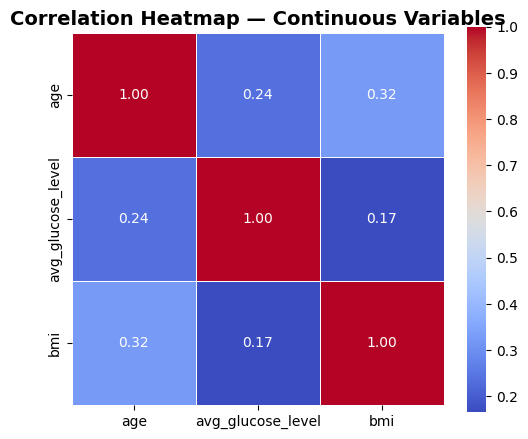

In [126]:
cont_vars = ['age', 'avg_glucose_level', 'bmi']

corr = df[cont_vars].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap — Continuous Variables", fontsize=14, fontweight='bold')
plt.show()


## 2.5 Visualizations of the correlations between features

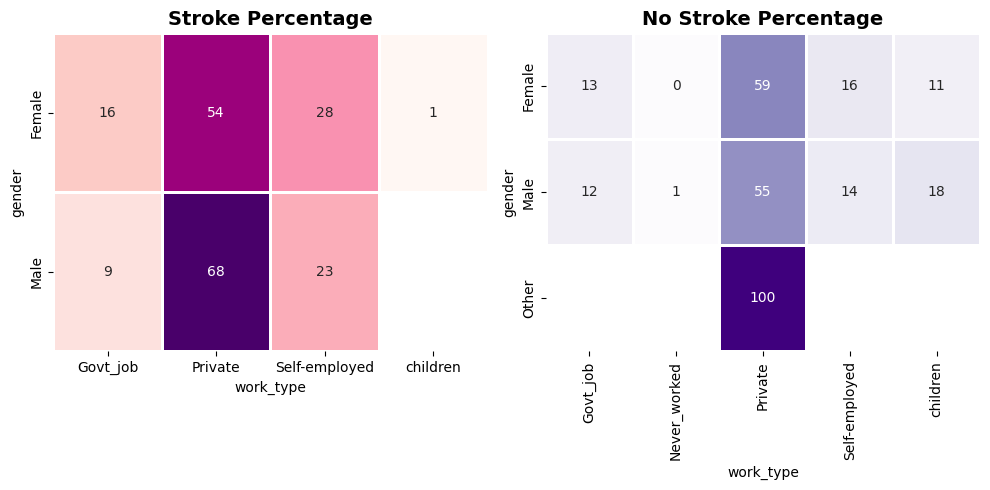

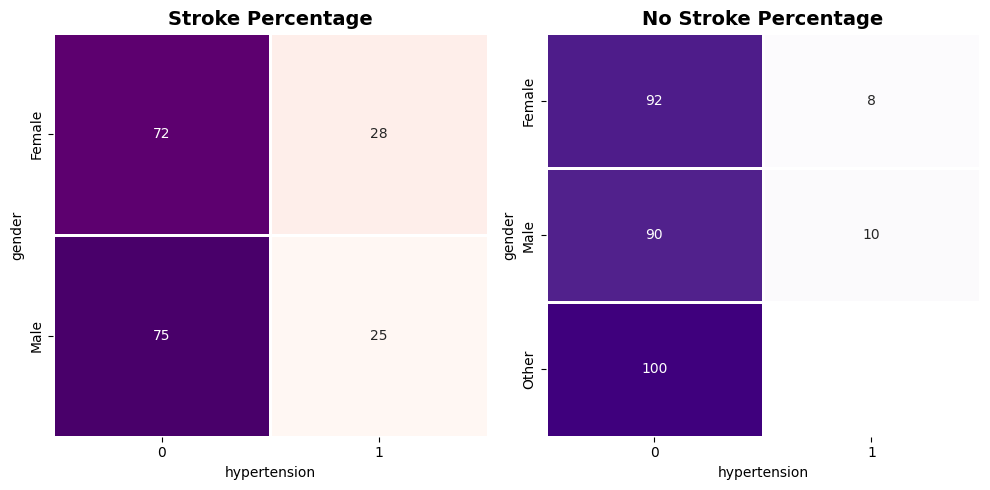

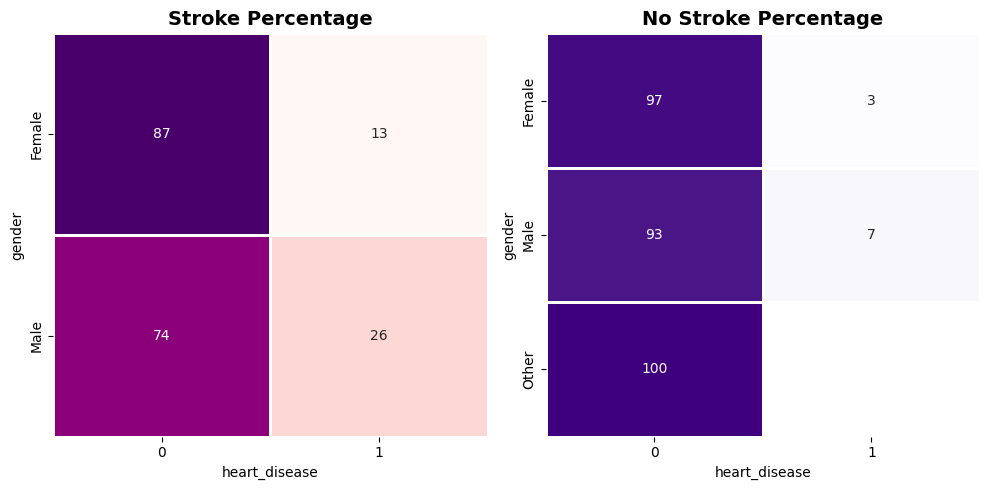

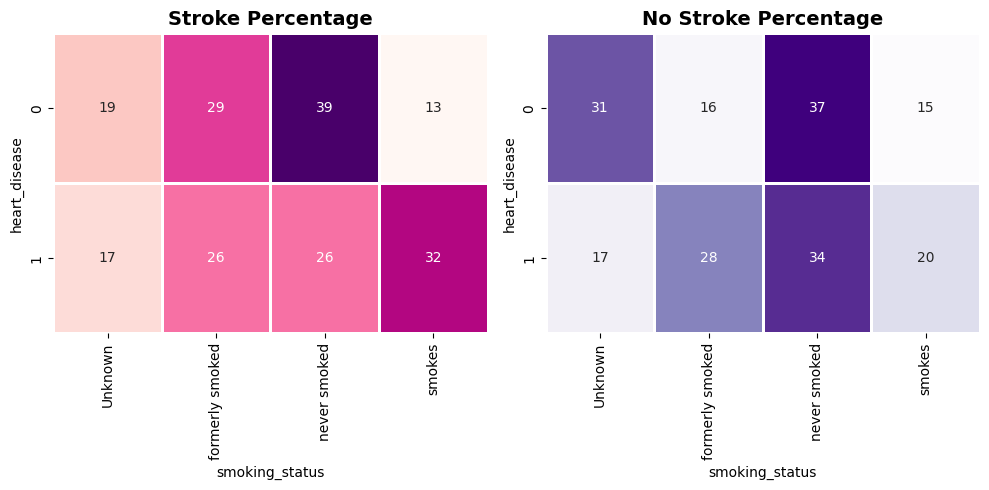

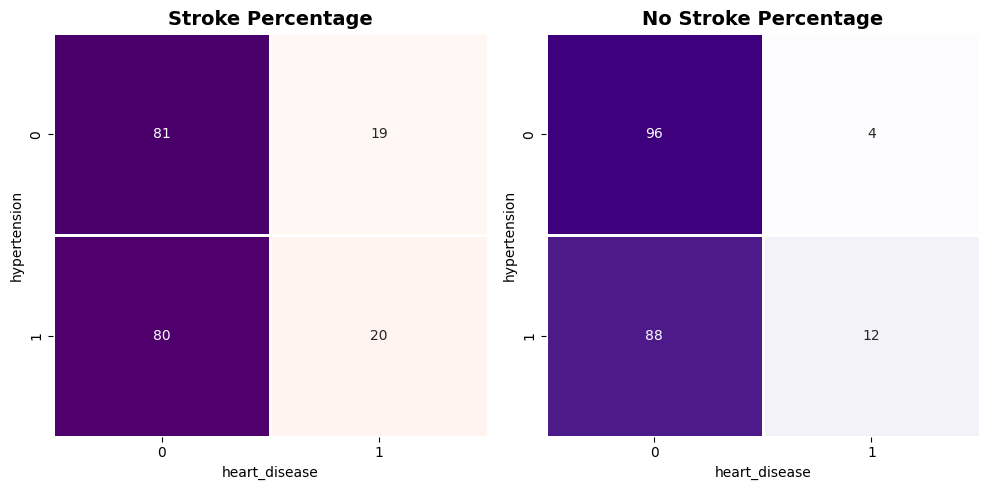

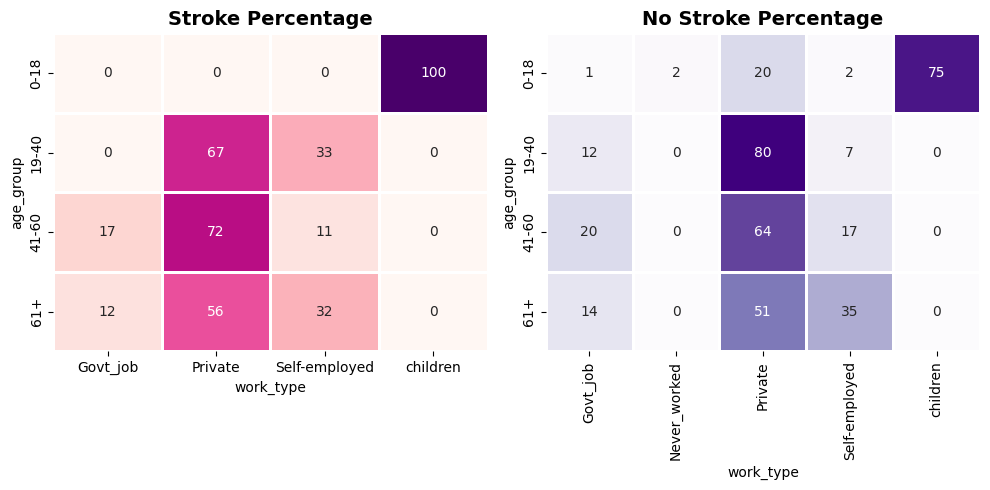

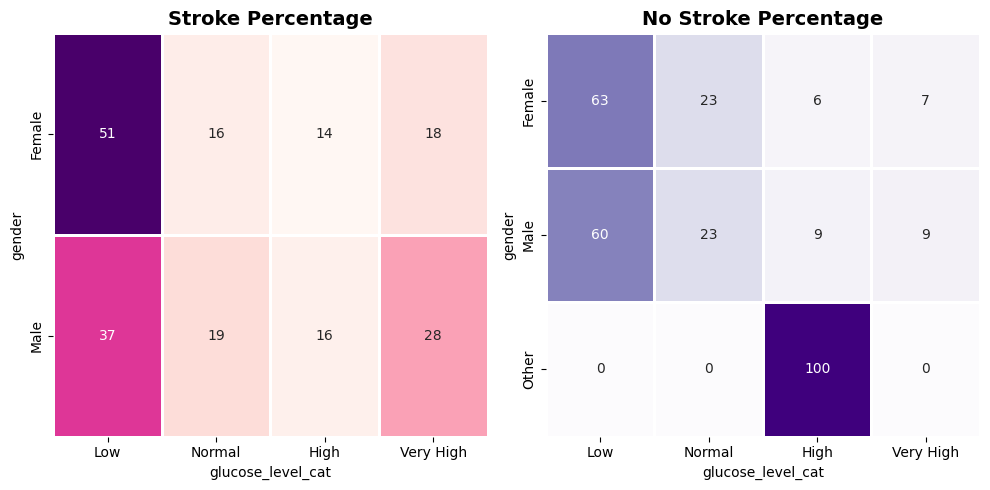

In [127]:
def plot_stroke_heatmaps(df, col1, col2):

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    for i, stroke_value in enumerate([1, 0]):
        temp = df[df['stroke'] == stroke_value]
        pct_table = (temp.groupby([col1, col2]).size() / temp.groupby(col1).size()).unstack() * 100

        sns.heatmap(
            pct_table, annot=True, fmt=".0f",
            cmap="RdPu" if stroke_value else "Purples",
            cbar=False, linewidths=1, ax=axes[i]
        )
        axes[i].set_title(f"{'Stroke' if stroke_value else 'No Stroke'} Percentage", fontsize=14, fontweight='bold')
        axes[i].set_ylabel(col1)
        axes[i].set_xlabel(col2)

    plt.tight_layout()
    plt.show()


pairs = [
    ('gender', 'work_type'),
    ('gender', 'hypertension'),
    ('gender', 'heart_disease'),
    ('gender', 'marital_status'),
    ('heart_disease', 'smoking_status'),
    ('hypertension', 'heart_disease'),
    ('age_group', 'work_type'),
    ('gender', 'glucose_level_cat')
]

df['age_group'] = pd.cut(df['age'], bins=[0, 18, 40, 60, 100],
                         labels=['0-18', '19-40', '41-60', '61+'])

df['glucose_level_cat'] = pd.cut(df['avg_glucose_level'], bins=[0, 100, 140, 200, 300],
                                 labels=['Low', 'Normal', 'High', 'Very High'])

for col1, col2 in pairs:
    if col1 in df.columns and col2 in df.columns:
        plot_stroke_heatmaps(df, col1, col2)


* Marriage surprisingly increases stroke rates, with men being more affected than women.

* Men and women working in the private sector clearly have a higher incidence of strokes.

* Interestingly, men who have quit smoking and women who have never smoked show a higher likelihood of having a stroke.

* Regardless of gender, strokes are observed more frequently in older individuals.

* People without any heart problems are at the same level of stroke risk whether or not they have hypertension, and the percentage is notably high.

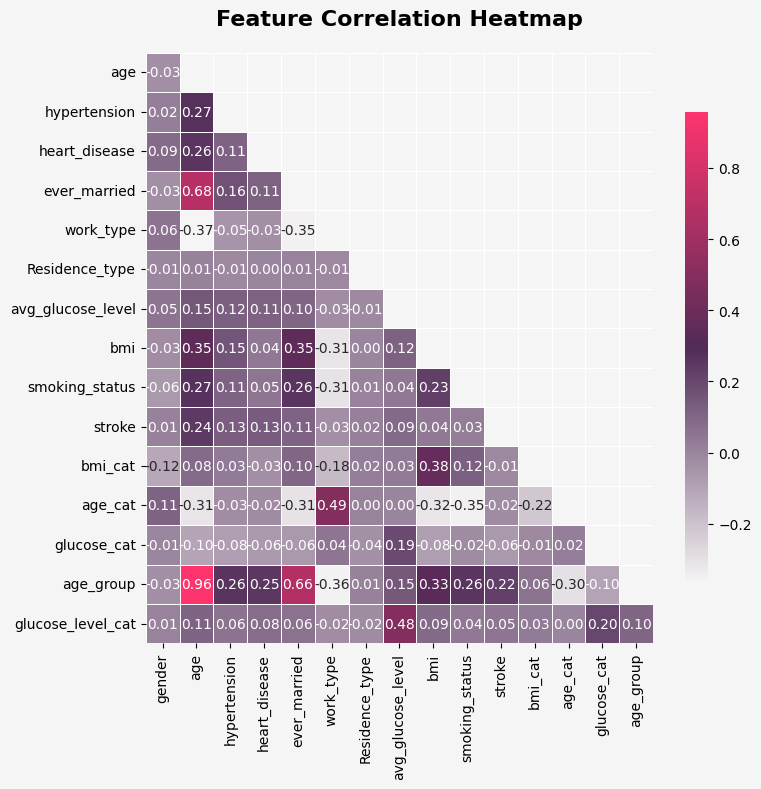

In [129]:
df_copy = df.copy()

df_copy['age'] = df_copy['age'].apply(lambda x: np.log(x+10)*3)
df_copy['avg_glucose_level'] = df_copy['avg_glucose_level'].apply(lambda x: np.log(x+10)*2)
df_copy['bmi'] = df_copy['bmi'].apply(lambda x: np.log(x+10)*2)


ohe = OneHotEncoder()
ss = StandardScaler()
le = LabelEncoder()

for col in df_copy.columns:
    df_copy[col] = le.fit_transform(df_copy[col])

cols = df_copy.columns

df_copy[cols] = ss.fit_transform(df_copy[cols])
df_corr = df_copy.drop(columns = ['id']).corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

fig, ax = plt.subplots(figsize = (8,8))
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()


colors = ['#f6f5f5','#512b58','#fe346e']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(
    corr,
    mask=mask,
    cmap=colormap,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": .8},
    ax=ax
)

ax.set_title("Feature Correlation Heatmap", fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

* As expected, there is a high correlation between age and marital status.

## Checking Multicollinarity

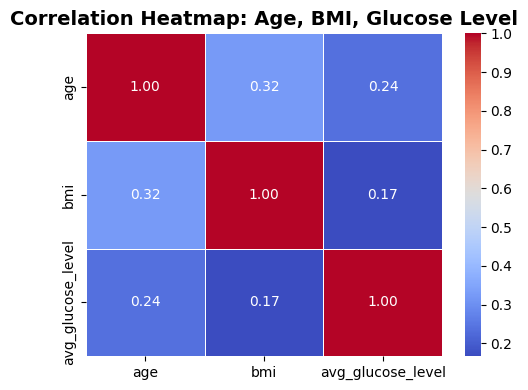

In [130]:
cols = ['age', 'bmi', 'avg_glucose_level']

df_subset = df[cols].fillna(df[cols].median())

corr_matrix = df_subset.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Age, BMI, Glucose Level", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

There is no observed risk of multicollinearity.

# 3. Visualization of Data Balancing with Datasampling Techniques

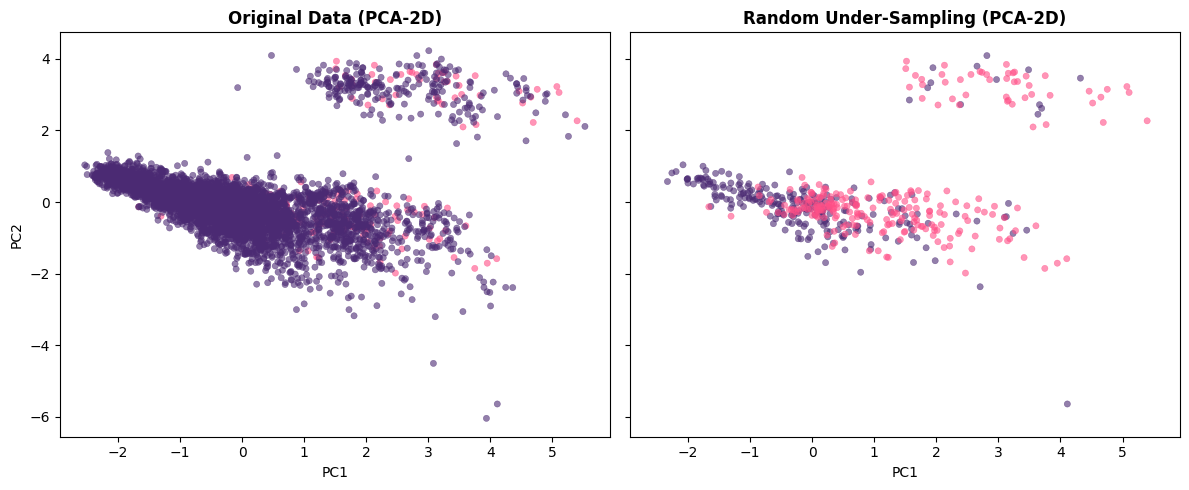

In [132]:
num_cols = df.select_dtypes(include=[np.number]).columns.drop(['stroke','id'], errors='ignore').tolist()

df_num = df[num_cols + ['stroke']].copy()
df_num[num_cols] = df_num[num_cols].fillna(df_num[num_cols].median())

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(df_num[num_cols], df_num['stroke'])
df_res = pd.concat([X_res, y_res.rename('stroke')], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num[num_cols])
X_res_scaled = scaler.transform(df_res[num_cols])

pca = PCA(n_components=2, random_state=42)
orig_2d = pca.fit_transform(X_scaled)
res_2d  = pca.transform(X_res_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)
for ax, XY, y, title in [
    (axes[0], orig_2d, df_num['stroke'].values, "Original Data (PCA-2D)"),
    (axes[1], res_2d,  df_res['stroke'].values, "Random Under-Sampling (PCA-2D)")
]:
    sns.scatterplot(x=XY[:,0], y=XY[:,1], hue=y, palette={0:"#4b2a73",1:"#ff4f87"},
                    alpha=0.6, s=20, edgecolor=None, ax=ax, legend=False)
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel("PC1"); ax.set_ylabel("PC2")

plt.tight_layout()
plt.show()


* In the original dataset, the "no stroke" class is much larger than the "stroke" class, indicating a class imbalance problem. After random sampling on the right, the class sizes have become more balanced.

* Next, we will apply a series of oversampling and undersampling techniques to determine the most suitable one.

## Oversampling

Before: Counter({0: 3889, 1: 199})
SMOTE : Counter({0: 3889, 1: 3889})
ADASYN: Counter({0: 3889, 1: 3884})


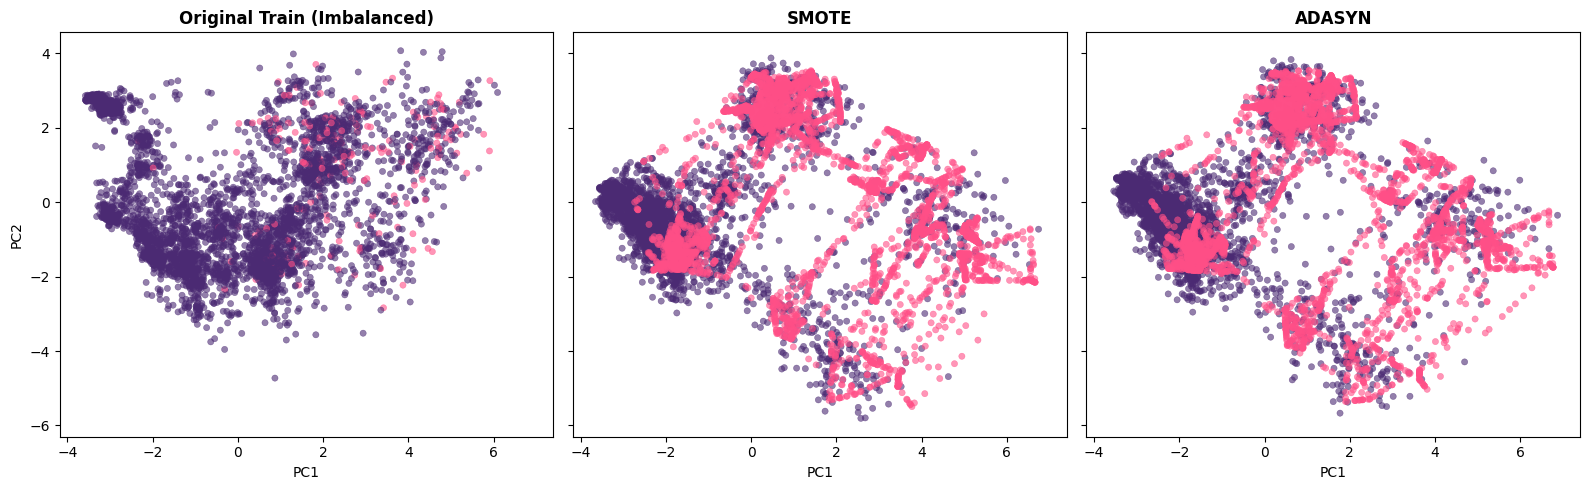

In [133]:
FEATURES = [c for c in df.columns if c not in ['stroke', 'id']]
X = df[FEATURES]
y = df['stroke'].astype(int)

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler(with_mean=False)
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

smote = SMOTE(random_state=42, k_neighbors=5)
adas  = ADASYN(random_state=42, n_neighbors=5)

X_sm, y_sm   = smote.fit_resample(X_train_sc, y_train)
X_ad, y_ad   = adas.fit_resample(X_train_sc, y_train)

print("Before:", Counter(y_train))
print("SMOTE :", Counter(y_sm))
print("ADASYN:", Counter(y_ad))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def pca_scatter(X_arr, y_arr, title, ax):
    pca = PCA(n_components=2, random_state=42)
    XY = pca.fit_transform(X_arr.toarray() if hasattr(X_arr, "toarray") else X_arr)
    sns.scatterplot(x=XY[:,0], y=XY[:,1], hue=y_arr, palette={0:"#4b2a73",1:"#ff4f87"},
                    alpha=0.6, s=20, edgecolor=None, ax=ax, legend=False)
    ax.set_title(title, fontweight='bold'); ax.set_xlabel("PC1"); ax.set_ylabel("PC2")

fig, axes = plt.subplots(1, 3, figsize=(16,5), sharex=True, sharey=True)
pca_scatter(X_train_sc, y_train, "Original Train (Imbalanced)", axes[0])
pca_scatter(X_sm, y_sm, "SMOTE", axes[1])
pca_scatter(X_ad, y_ad, "ADASYN", axes[2])
plt.tight_layout(); plt.show()



## Undersampling

Before: Counter({0: 3889, 1: 199})
RandomUnderSampler: Counter({0: 199, 1: 199})
NearMiss: Counter({0: 199, 1: 199})

== Original (Imbalanced) ==
              precision    recall  f1-score   support

           0      0.951     1.000     0.975       972
           1      0.000     0.000     0.000        50

    accuracy                          0.951      1022
   macro avg      0.476     0.500     0.487      1022
weighted avg      0.905     0.951     0.927      1022


== RandomUnderSampler ==
              precision    recall  f1-score   support

           0      0.985     0.678     0.803       972
           1      0.113     0.800     0.199        50

    accuracy                          0.684      1022
   macro avg      0.549     0.739     0.501      1022
weighted avg      0.942     0.684     0.774      1022


== NearMiss ==
              precision    recall  f1-score   support

           0      0.964     0.248     0.394       972
           1      0.053     0.820     0.100      

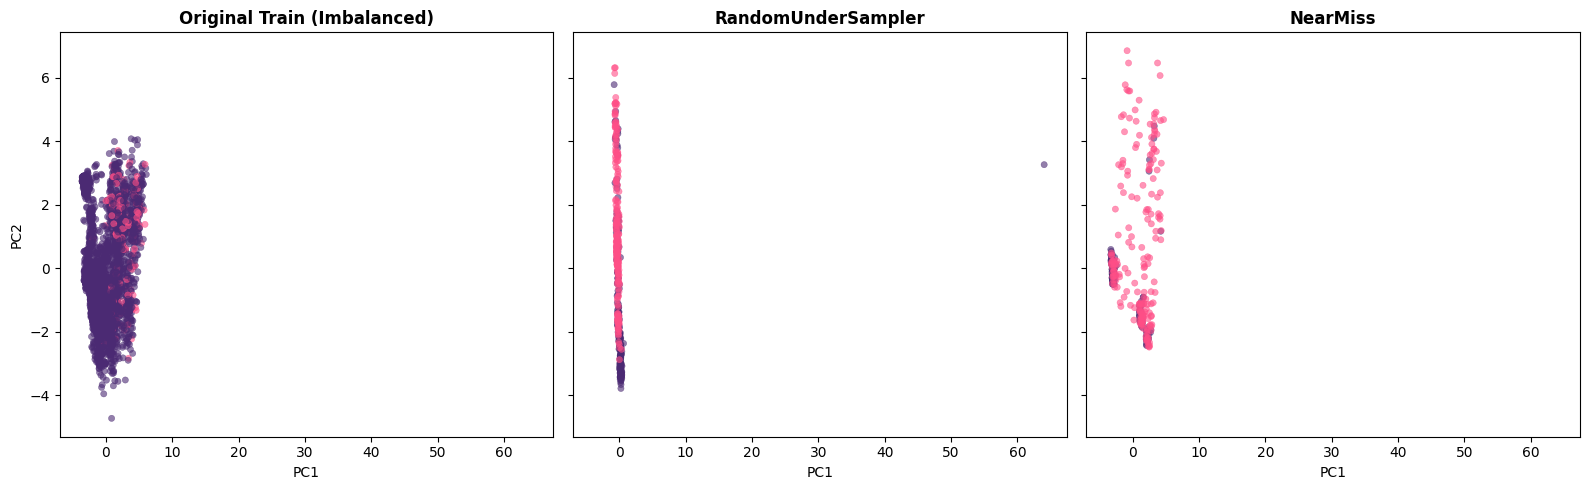

In [135]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train_sc, y_train)

nm = NearMiss(version=1)
X_nm, y_nm = nm.fit_resample(X_train_sc, y_train)

print("Before:", Counter(y_train))
print("RandomUnderSampler:", Counter(y_rus))
print("NearMiss:", Counter(y_nm))

def quick_fit_eval(X_tr, y_tr, name):
    clf = LogisticRegression(max_iter=200, n_jobs=None)
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_test_sc)
    print(f"\n== {name} ==")
    print(classification_report(y_test, y_pred, digits=3))

quick_fit_eval(X_train_sc, y_train, "Original (Imbalanced)")

quick_fit_eval(X_rus, y_rus, "RandomUnderSampler")

quick_fit_eval(X_nm, y_nm, "NearMiss")

def pca_scatter(X_arr, y_arr, title, ax):
    pca = PCA(n_components=2, random_state=42)
    XY = pca.fit_transform(X_arr.toarray() if hasattr(X_arr, "toarray") else X_arr)
    sns.scatterplot(x=XY[:,0], y=XY[:,1], hue=y_arr, palette={0:"#4b2a73",1:"#ff4f87"},
                    alpha=0.6, s=20, edgecolor=None, ax=ax, legend=False)
    ax.set_title(title, fontweight='bold'); ax.set_xlabel("PC1"); ax.set_ylabel("PC2")

fig, axes = plt.subplots(1, 3, figsize=(16,5), sharex=True, sharey=True)
pca_scatter(X_train_sc, y_train, "Original Train (Imbalanced)", axes[0])
pca_scatter(X_rus, y_rus, "RandomUnderSampler", axes[1])
pca_scatter(X_nm, y_nm, "NearMiss", axes[2])
plt.tight_layout(); plt.show()


* RandomUnderSampler → Balanced data was obtained, but the model’s overall accuracy decreased due to data loss.

* NearMiss → Kept samples near the class boundary, but reduced the dataset size, limiting the model’s ability to learn complex patterns.

* ADASYN → Focused on hard-to-learn minority samples but added noise, which distorted the decision boundary.

* SMOTE → Maintained feature distributions while balancing data through neighborhood-based synthetic data generation.

* With SMOTE-applied data, the model’s Recall value increased significantly — a critical improvement for reducing false negatives, especially in sensitive domains like healthcare.

# 4. Modelling and Results

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle = True, random_state = 2021)

smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X_train, y_train.ravel())

print('Shape of Training features: {}'.format(X_resample.shape))
print('Shape of Training targets: {}'.format(y_resample.shape))
print('Shape of Testing features: {}'.format(X_test.shape))
print('Shape of Testing targets: {}'.format(y_test.shape))

Shape of Training features: (7284, 31)
Shape of Training targets: (7284,)
Shape of Testing features: (1278, 31)
Shape of Testing targets: (1278,)


In [137]:
random_state = 2021
classifiers = []
classifiers.append(SVC(random_state=random_state, probability = True))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(XGBClassifier(random_state = random_state,eval_metric = 'logloss',learning_rate = 0.054))
classifiers.append(LGBMClassifier(random_state = random_state,learning_rate = 0.067))


results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Confusion Matrix'])

for classifier in classifiers:
    model_name = type(classifier).__name__
    print(f"Training {model_name}...")

    classifier.fit(X_resample, y_resample)

    y_pred = classifier.predict(X_test)
    y_proba = classifier.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    results_df = pd.concat([results_df, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': cm.tolist()
    }])], ignore_index=True)

    print(f"Finished {model_name}.\n")

display(results_df)

Training SVC...
Finished SVC.

Training DecisionTreeClassifier...
Finished DecisionTreeClassifier.

Training AdaBoostClassifier...
Finished AdaBoostClassifier.

Training RandomForestClassifier...
Finished RandomForestClassifier.

Training GradientBoostingClassifier...
Finished GradientBoostingClassifier.

Training KNeighborsClassifier...
Finished KNeighborsClassifier.

Training LogisticRegression...
Finished LogisticRegression.

Training XGBClassifier...
Finished XGBClassifier.

Training LGBMClassifier...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3642, number of negative: 3642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 7284, number of used fe

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Confusion Matrix
0,SVC,0.711268,0.104592,0.694915,0.181818,0.811154,"[[868, 351], [18, 41]]"
1,DecisionTreeClassifier,0.892019,0.130841,0.237288,0.168675,0.580498,"[[1126, 93], [45, 14]]"
2,AdaBoostClassifier,0.894366,0.127451,0.220339,0.161491,0.573664,"[[1130, 89], [46, 13]]"
3,RandomForestClassifier,0.927230,0.130435,0.101695,0.114286,0.779661,"[[1179, 40], [53, 6]]"
4,GradientBoostingClassifier,0.874804,0.125926,0.288136,0.175258,0.770929,"[[1101, 118], [42, 17]]"
5,KNeighborsClassifier,0.816901,0.139918,0.576271,0.225166,0.742203,"[[1010, 209], [25, 34]]"
6,LogisticRegression,0.844288,0.106742,0.322034,0.160338,0.699893,"[[1060, 159], [40, 19]]"
7,XGBClassifier,0.892801,0.132075,0.237288,0.169697,0.780467,"[[1127, 92], [45, 14]]"
8,LGBMClassifier,0.916275,0.157143,0.186441,0.170543,0.792508,"[[1160, 59], [48, 11]]"


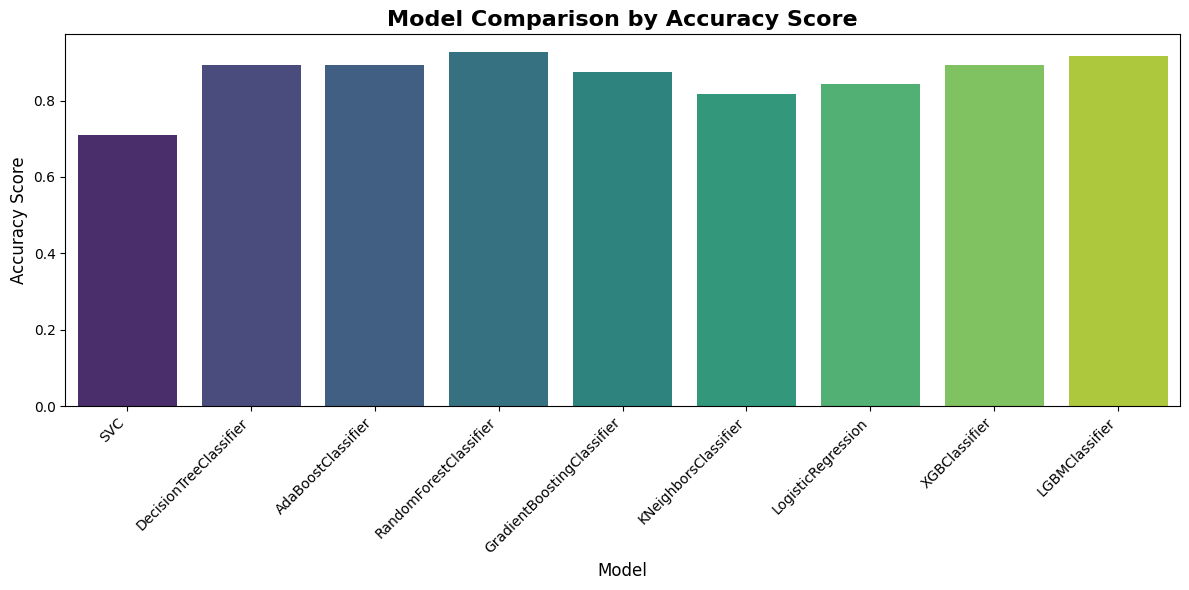

In [144]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison by Accuracy Score', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('a Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Random Forest performed the best, but its recall score is still quite low.
We should now apply Grid Search to optimize hyperparameters — focusing on recall as the primary scoring metric to reduce false negatives, which is crucial in the stroke detection context.










In [141]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [2, 3, 4],
    'bootstrap': [True, False]
}

rfc = RandomForestClassifier(random_state=random_state)

grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

print("Performing Grid Search for RandomForestClassifier...")
grid_search_rfc.fit(X_resample, y_resample)

print("\nBest parameters found:")
print(grid_search_rfc.best_params_)

print("\nBest cross-validation recall score:")
print(grid_search_rfc.best_score_)

best_rfc = grid_search_rfc.best_estimator_
y_pred_rfc = best_rfc.predict(X_test)

print("\nEvaluation of the best RandomForestClassifier on the original test data:")
print(classification_report(y_test, y_pred_rfc, digits=3))

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print("\nConfusion Matrix:")
print(cm_rfc)

Performing Grid Search for RandomForestClassifier...

Best parameters found:
{'bootstrap': True, 'max_features': 2, 'n_estimators': 100}

Best cross-validation recall score:
0.9714297019852577

Evaluation of the best RandomForestClassifier on the original test data:
              precision    recall  f1-score   support

           0      0.958     0.968     0.963      1219
           1      0.152     0.119     0.133        59

    accuracy                          0.929      1278
   macro avg      0.555     0.543     0.548      1278
weighted avg      0.921     0.929     0.925      1278


Confusion Matrix:
[[1180   39]
 [  52    7]]


Top 10 Feature Importances:


,Feature,Importance
0,age,0.167625
3,avg_glucose_level,0.095295
4,bmi,0.081459
21,age_cat_Elderly Man/Woman,0.073770
27,age_group_61+,0.070616
13,smoking_status_formerly smoked,0.048116
9,work_type_Private,0.041749
10,work_type_Self-employed,0.034888
12,Residence_type_Urban,0.034236
7,ever_married_Yes,0.032429


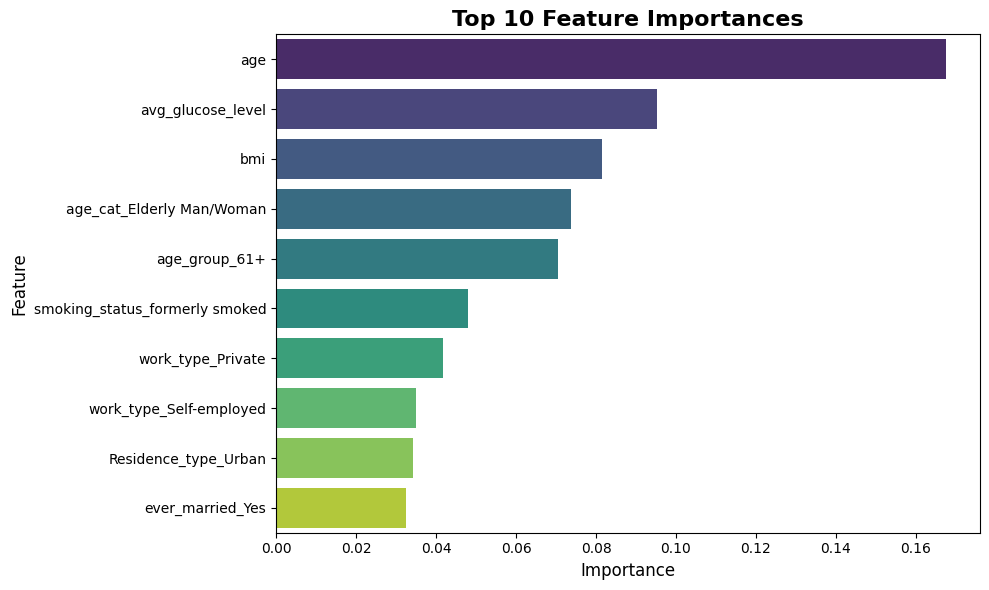

In [145]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'Feature': df.columns, 'Importance': m.feature_importances_}).sort_values('Importance', ascending=False)

fi = rf_feat_importance(best_rfc, X)

print("Top 10 Feature Importances:")
display(fi.head(10).style.background_gradient(cmap='viridis'))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi.head(10), palette='viridis')
plt.title('Top 10 Feature Importances', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

* Age, BMI, and Average Glucose Level are the most important features in our model. The table shows the percentage weight of each. Additionally, a person's smoking status and type of occupation appear to be more important than their place of residence or marital status.

* Interestingly, having heart disease and hypertension did not even make it into the top 10 most influential features.

# Suggestions

1) Improving Model Performance

* Use Bayesian Optimization (Optuna/Hyperopt) to find the best hyperparameters more quickly and effectively.

* Apply Stacking Ensemble to combine the outputs of the best models and boost performance.

2) Feature Engineering & Data Enrichment

* Add Interaction Features (e.g., age × hypertension).

* Use Box-Cox or Yeo-Johnson Transformation to better normalize feature distributions.

3) Advanced Analysis & Explainability

* Perform SHAP Analysis to see how each feature individually influences predictions.

* Create Partial Dependence Plots (PDP) to visualize the effect of individual features on the target.

4) Data Enhancement

* Test advanced oversampling methods such as Borderline-SMOTE.

* Apply Feature Selection (Boruta, RFE) to remove unnecessary variables.
